# Cryptography

Cryptography is everywhere in modern life. Everytime you send or receive some kind of electronic communication, it will encrypted in some way. The strength of the encryption will depend on how sensitive the information is. 

## Making codes with code

First, let's look a the simplest type of code: the *substitution cipher*. Here, we simply switch one letter in the alphabet for another. One way of doing this is known as the *Caesar shift cipher*: we shift each letter in the alphabet by some integer. Let's write some code to use this to encrypt a message that I'd like to send to my friend Bob. 

In [9]:
def caesar_shift(message, n=3):
    
    encrypted_message = ""
    
    # iterate over characters in message
    for c in message.lower():
        # check if the character is a letter
        if c.isalpha():
            # here we convert to the ascii representation using ord(), subtract off the 
            # ascii representation of 'a', add on the shift, then find the remainder of division 
            # by 26 (the number of letters in the alphabet), and add back on the ascii representation 
            # of 'a'. We convert it back to a character and add it to our message
            l = (ord(c) - ord('a') + n)% 26 + ord('a')
            encrypted_message += chr(l)
            # add spaces in 
        elif c == ' ':
            encrypted_message += ' '
            
    return encrypted_message

In [10]:
caesar_shift('Hi Bob! How are you?')

'kl ere krz duh brx'

Great! But what if Bob wants to decrypt my message? We need to do the reverse operation:

In [17]:
def decrypt_caesar(encrypted_message, n=3):
    
    message = ""
    
    for c in encrypted_message:
        if c.isalpha():
            l = (ord(c) - ord('a') - n)% 26 + ord('a')
            message += chr(l)
        else:
            message += ' '
            
    return message

In [20]:
encrypted_message = caesar_shift('Hi Bob! How are you?')

decrypt_caesar(encrypted_message)

'hi bob how are you'

## Breaking codes with code

Excellent! Unfortunately a simple encryption like this is pretty easy to break. For example, say our nosy friend Charlie is trying to listen in our conversation. Charlie could easily just brute force this using a loop over all the possible values of `n` until they hit upon a message that made sense:

In [21]:
for n in range(26):
    print(decrypt_caesar(encrypted_message, n))

kl ere krz duh brx
jk dqd jqy ctg aqw
ij cpc ipx bsf zpv
hi bob how are you
gh ana gnv zqd xnt
fg zmz fmu ypc wms
ef yly elt xob vlr
de xkx dks wna ukq
cd wjw cjr vmz tjp
bc viv biq uly sio
ab uhu ahp tkx rhn
za tgt zgo sjw qgm
yz sfs yfn riv pfl
xy rer xem qhu oek
wx qdq wdl pgt ndj
vw pcp vck ofs mci
uv obo ubj ner lbh
tu nan tai mdq kag
st mzm szh lcp jzf
rs lyl ryg kbo iye
qr kxk qxf jan hxd
pq jwj pwe izm gwc
op ivi ovd hyl fvb
no huh nuc gxk eua
mn gtg mtb fwj dtz
lm fsf lsa evi csy


That took 2 lines and fraction of a second for our computer to break :(. Instead of just shifting the letters, we could instead scramble them in some random order. Fortunately, this is a lot more secure against brute force attacks like this, as now rather than there being 26 different variations for Charlie to brute force, there are $26! > 4 \times 10^{26}$.

## Frequency analysis

However, if we used the same random order each time such that Charlie could build up a longer set of messages, this would still be pretty easy to break using *frequency analysis*. In the English language, the letters used tend to follow a standard frequency distribution, with 'e' being the most common, and 'z' the least common. All Charlie would have to do would be to plot the frequency of each letter in the messages and compare that against the frequency of letters in the English language. It wouldn't take too long to work out which letters were associated with each other. 

Let's try this now.

In [51]:
import numpy as np

def encrypt(message, key):
    
    encrypted_message = ""
    
    for c in message.lower():
        if c.isalpha():
            # convert to integer using the ascii representation
            l = ord(c) - ord('a')
            # look up the new letter in the key
            new_l = key[l]
            
            encrypted_message += chr(new_l + ord('a'))
            
        elif c == ' ':
            encrypted_message += ' '
            
    return encrypted_message

def decrypt(encrypted_message, key):
    
    message = ""
    
    for c in encrypted_message:
        if c.isalpha():
            l = ord(c) - ord('a')
            
            # look up the new letter in the key
            new_l = np.where(key == l)[0]
            
            message += chr(new_l + ord('a'))
            
        else:
            message += ' '
            
    return message
            
            

In [89]:
from numpy.random import permutation

# Here we will define the encryption/decryption key that Bob and I will use for our messages.
# It's a random permutation of the numbers 0-25.
key = permutation(range(26))

In [90]:
encrypted_message = encrypt('hi bob! how are you?', key)
print(encrypted_message)

decrypt(encrypted_message, key)

zl whw zha ocy vhj


'hi bob how are you'

Right, we have our encryption and decryption working. Let's see what Charlie might do to try and break it. First, let's plot the standard frequency distribution of letters in English.

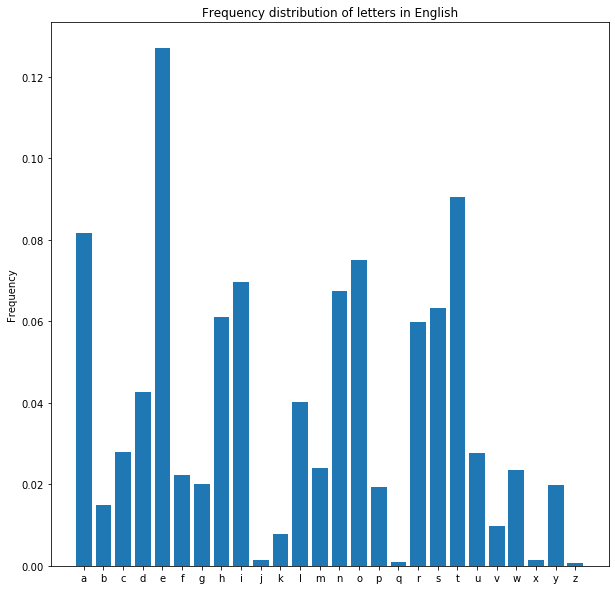

In [91]:
freqs = np.array([8.167,1.492,2.782,4.253,12.702,2.228,2.015,6.094,6.966,0.153,0.772,4.025,2.406,6.749,
         7.507,1.929,0.095,5.987,6.327,9.056,2.758,0.978,2.360,0.150,1.974,0.074]) / 100
 
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))

letters = [chr(n + ord('a')) for n in range(26)]

x_pos = np.arange(26)

ax.bar(x_pos, freqs, align='center');
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in English')

plt.show()

As expected, the frequencies of letters like a, e and t are highest, whereas there are very few j's, q's, x's or z's. Now let's encrypt a longer message and see what happens when we compare the frequency distribution of letters against standard English.

In [92]:
message = "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.Bilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure. And if that was not enough for fame, there was also his prolonged vigour to marvel at. Time wore on, but it seemed to have little effect on Mr. Baggins. At ninety he was much the same as at fifty. At ninety-nine they began to call him well-preserved ; but unchanged would have been nearer the mark. There were some that shook their heads and thought this was too much of a good thing; it seemed unfair that anyone should possess (apparently) perpetual youth as well as (reputedly) inexhaustible wealth.‘It will have to be paid for,’ they said. ‘It isn’t natural, and trouble will come of it!’But so far trouble had not come; and as Mr. Baggins was generous with his money, most people were willing to forgive him his oddities and his good fortune. He remained on visiting terms with his relatives (except, of course, the Sackville-Bagginses), and he had many devoted admirers among the hobbits of poor and unimportant families. But he had no close friends, until some of his younger cousins began to grow up.The eldest of these, and Bilbo’s favourite, was young Frodo Baggins. When Bilbo was ninety-nine he adopted Frodo as his heir, and brought him to live at Bag End; and the hopes of the Sackville-Bagginses were finally dashed. Bilbo and Frodo happened to have the same birthday, September 22nd. ‘You had better come and live here, Frodo my lad,’ said Bilbo one day; ‘and then we can celebrate our birthday-parties comfortably together.’ At that time Frodo was still in his tweens, as the hobbits called the irresponsible twenties between childhood and coming of age at thirty-three.Twelve more years passed. Each year the Bagginses had given very lively combined birthday-parties at Bag End; but now it was understood that something quite exceptional was being planned for that autumn. Bilbo was going to be eleventy-one , 111, a rather curious number, and a very respectable age for a hobbit (the Old Took himself had only reached 130); and Frodo was going to be thirty-three , 33, an important number: the date of his ‘coming of age’."

In [93]:
encrypted_message = encrypt(message, key)
encrypted_message

'azyx kc wldwh wogglxb hm wog yxi oxxhjxqyi szos zy ahjdi bzhcsdv wy qydywcoslxg zlb ydyfyxsvmlcbs wlcsziov alsz o rocsv hm bryqlod kogxlmlqyxqy szycy aob kjqz sodp oxi ytqlsykyxs lx zhwwlshxwldwh aob fycv clqz oxi fycv ryqjdloc oxi zoi wyyx szy ahxiyc hm szy bzlcy mhc bltsv vyocb yfyc blxqy zlb cykocpowdy ilborryocoxqy oxi jxytryqsyi cysjcx szy clqzyb zy zoi wchjgzs woqp mchk zlb scofydb zoi xha wyqhky o dhqod dygyxi oxi ls aob rhrjdocdv wydlyfyi azosyfyc szy hdi mhdp klgzs bov szos szy zldd os wog yxi aob mjdd hm sjxxydb bsjmmyi alsz scyobjcy oxi lm szos aob xhs yxhjgz mhc moky szycy aob odbh zlb rchdhxgyi flghjc sh kocfyd os slky ahcy hx wjs ls byykyi sh zofy dlssdy ymmyqs hx kc wogglxb os xlxysv zy aob kjqz szy boky ob os mlmsv os xlxysvxlxy szyv wygox sh qodd zlk ayddrcybycfyi  wjs jxqzoxgyi ahjdi zofy wyyx xyocyc szy kocp szycy aycy bhky szos bzhhp szylc zyoib oxi szhjgzs szlb aob shh kjqz hm o ghhi szlxg ls byykyi jxmolc szos oxvhxy bzhjdi rhbbybb orrocyxsdv rycrysjod vhjsz ob a

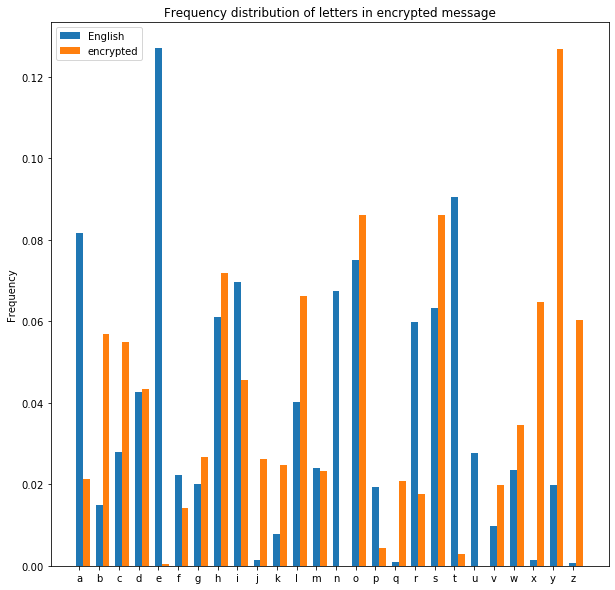

In [94]:
def calc_frequency(text):
    # remove whitespace
    text = text.replace(' ', '')
    n_letters = len(text)
    
    freqs = np.zeros(26)
    
    for c in text:
        freqs[ord(c) - ord('a')] += 1
        
    freqs /= len(text)
    
    return freqs

encrypted_freqs = calc_frequency(encrypted_message)

fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.35

ax.bar(x_pos, freqs, bar_width, label="English")
ax.bar(x_pos + bar_width, encrypted_freqs, bar_width, label="encrypted")
ax.set_xticks(x_pos)
ax.set_xticklabels(letters)

ax.set_ylabel('Frequency')

ax.set_title('Frequency distribution of letters in encrypted message')

plt.legend()

plt.show()

Here we can clearly see that the most frequent letters in the encrypted message do not line up with what we'd expect for something in standard English. Let's make a first pass at decrypting the message by assuming that the most common letter in the encrypted message is the same as the most common letter in English, and so on for all the other letters. 

In [104]:
# let's try and reshuffle the letters to see if we can make a first guess for what they should be 

# define a helper function to allow us to sort letters by their frequency
def take_second(elem):
    return elem[1]

sorted_english = sorted(zip(letters, freqs), key=take_second, reverse=True)

sorted_encrypted = sorted(zip(letters, encrypted_freqs), key=take_second, reverse=True)

# create a dictionary which matches up the letters in the encrypted message with letters in 
# standard english that have the same rank when sorted by frequency
letter_pairs = dict(zip([l[0] for l in sorted_encrypted], [l[0] for l in sorted_english]))

decrypted = ""

# use the dictionary of letter pairs to try and decrypt the message
for c in encrypted_message:
    if c.isalpha():
        decrypted += letter_pairs[c]
    else:
        decrypted += ' '

In [105]:
decrypted

'gsen wr cilco ctuuinh of ctu end tnnomnyed asta se gomld hsoralp ce yelecrtainu sih elevenapfirha cirasdtp gias t btrap of hbeyitl wtunifiyenye asere gth wmys atlk tnd ejyiaewena in socciaoncilco gth verp riys tnd verp beymlitr tnd std ceen ase gonder of ase hsire for hijap petrh ever hinye sih rewtrktcle dihtbbetrtnye tnd mnejbeyaed reamrn ase riyseh se std cromusa ctyk frow sih artvelh std nog ceyowe t loytl leuend tnd ia gth bobmltrlp celieved gstaever ase old folk wiusa htp asta ase sill ta ctu end gth fmll of amnnelh hamffed gias arethmre tnd if asta gth noa enomus for ftwe asere gth tlho sih brolonued viuomr ao wtrvel ta aiwe gore on cma ia heewed ao stve liaale effeya on wr ctuuinh ta nineap se gth wmys ase htwe th ta fifap ta nineapnine asep ceutn ao ytll siw gellbreherved  cma mnystnued gomld stve ceen netrer ase wtrk asere gere howe asta hsook aseir setdh tnd asomusa asih gth aoo wmys of t uood asinu ia heewed mnftir asta tnpone hsomld bohhehh tbbtrenalp berbeamtl pomas th g

In [115]:
message

'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.Bilbo was very rich and very peculiar, and had been the wonder of the Shire for sixty years, ever since his remarkable disappearance and unexpected return. The riches he had brought back from his travels had now become a local legend, and it was popularly believed, whatever the old folk might say, that the Hill at Bag End was full of tunnels stuffed with treasure. And if that was not enough for fame, there was also his prolonged vigour to marvel at. Time wore on, but it seemed to have little effect on Mr. Baggins. At ninety he was much the same as at fifty. At ninety-nine they began to call him well-preserved ; but unchanged would have been nearer the mark. There were some that shook their heads and thought this was too much of a good thing; it seemed unfair that anyone should possess (apparent

Hmmm not great, but good for a first attempt! We can see that even with this pretty simple brute force attempt, we've been able to decrypt the letters e, n, r, l, o, d, i, v, f, k... We can even spot some entire words in there: end, eleven, old, folk, one, frodo, of, live, for... With a little more care, it wouldn't take too long to decrypt the message entirely. Clearly if Bob and I are going to stop Charlie from listening in, we're going to need something more clever than a substitution cipher.

## More complex encryption goes here